# S1

In [5]:
from transformers import GPT2LMHeadModel
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")

Loading weights:   0%|          | 0/148 [00:00<?, ?it/s]

GPT2LMHeadModel LOAD REPORT from: gpt2
Key                  | Status     |  | 
---------------------+------------+--+-
h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [6]:
sd_hf = model_hf.state_dict()

for k,v in sd_hf.items():
    print(k, v.shape)


transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [8]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]  # print first 20 position embeddings

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

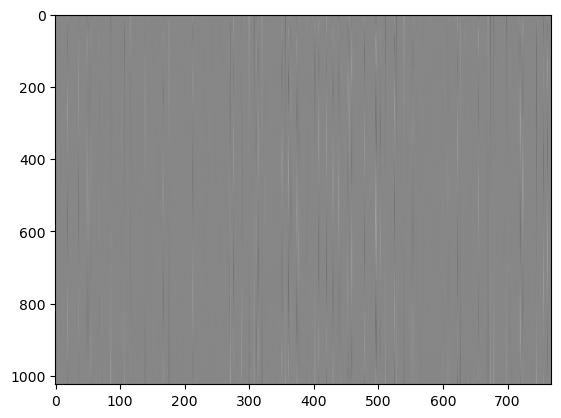

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(sd_hf["transformer.wpe.weight"], cmap='gray', aspect='auto')

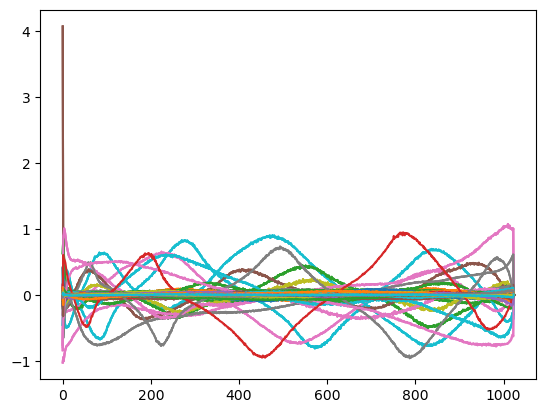

In [13]:
plt.plot(sd_hf["transformer.wpe.weight"][:,:150])
plt.plot(sd_hf["transformer.wpe.weight"][:,:200])
plt.plot(sd_hf["transformer.wpe.weight"][:,:250])

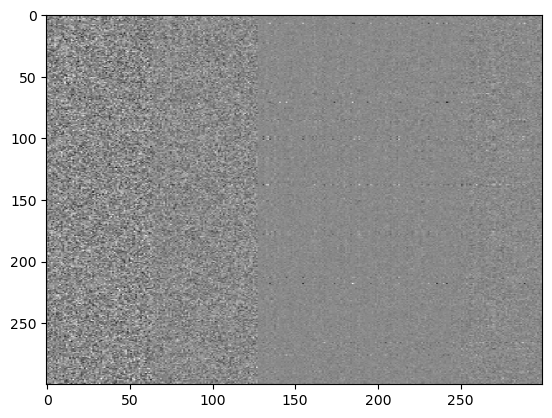

In [14]:
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:300,:300], cmap='gray', aspect='auto')

In [ ]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=4)

Loading weights:   0%|          | 0/148 [00:00<?, ?it/s]

GPT2LMHeadModel LOAD REPORT from: gpt2
Key                  | Status     |  | 
---------------------+------------+--+-
h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'Hello, I\'m a language model, so you can\'t just use the same data model and just use different languages. There\'s a lot of overlap between languages because there are so many different languages.\n\nBut in a lot of cases, I have a lot of different languages. There is a lot of confusion about what\'s right. I sometimes have to put a lot of stuff in the right order, but then it\'s not so clear what it is. Sometimes there are multiple languages that are using different languages. So I have a lot of confusion.\n\nSo, for example, if you\'re doing a lot of cross-platform development, where you\'re developing for a large cross-platform platform, you\'re using a lot of different languages. And you may not be able to understand the language. But if you do a lot of cross-platform development, you can understand the language.\n\nAnd so there\'s a lot of confusion.\n\nWhen I talk to people about languages, I\'m kind of using the same language, but it\'s different.\n\nSo, I 

# S2

In [2]:
import torch
import torch.nn.functional as F
from transformers import GPT2LMHeadModel

model = GPT2LMHeadModel.from_pretrained('gpt2')
print("model loaded successfully")
model.eval()
model.to('cuda')

import tiktoken
enc = tiktoken.get_encoding("gpt2")
tokens = enc.encode("hello,i'm a minGPT model")
tokens = torch.tensor(tokens, dtype=torch.long)
tokens = tokens.unsqueeze(0).repeat(5,1)
x = tokens.to('cuda')

torch.manual_seed(42)
torch.cuda.manual_seed(42)
while x.size(1) < 30:
    with torch.no_grad():
        outputs = model(x)
        logits = outputs.logits
        logits = logits[:, -1, :]
        probs = F.softmax(logits, dim=-1)
        topk_probs, topk_indices = torch.topk(probs, k=50, dim=-1)
        sampled_indices = torch.multinomial(topk_probs, num_samples=1)
        next_token = torch.gather(topk_indices, -1, sampled_indices)
        x = torch.cat((x, next_token), dim=1)

for i in range(x.size(0)):
    tokens_out = x[i].tolist()
    decoded = enc.decode(tokens_out)
    print(f">: {decoded}")

Loading weights:   0%|          | 0/148 [00:00<?, ?it/s]

GPT2LMHeadModel LOAD REPORT from: gpt2
Key                  | Status     |  | 
---------------------+------------+--+-
h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


model loaded successfully
>: hello,i'm a minGPT model, i was really excited to have your autoencoder and now i've got to know it,
>: hello,i'm a minGPT model. If you want to check if a model's weight is appropriate in the given weight class, then make
>: hello,i'm a minGPT model. I will only provide 3 items per model per set. All other items are based on the same model
>: hello,i'm a minGPT model of myself, but i'm a lulz tbh. A real, genuine b-lulz d
>: hello,i'm a minGPT model

i love the app and wish i could join the team

i think the team is great


# S3

In [1]:
# We always start with a dataset to train on. Let's download the tiny shakespeare dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

# read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

print("length of dataset in characters: ", len(text))

--2025-12-12 17:56:27--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M   368KB/s    in 3.0s    

2025-12-12 17:56:31 (368 KB/s) - ‘input.txt’ saved [1115394/1115394]

length of dataset in characters:  1115394


In [2]:
data = text[:1000]  # use a subset for training in this demo
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [ ]:
import tiktoken
enc = tiktoken.get_encoding("gpt2")
tokens = enc.encode(data)
print(f"length of dataset in tokens: {len(tokens)}")
print(f"first 20 tokens: {tokens[:20]}")

length of dataset in tokens: 285
first 20 tokens: [5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248]


In [5]:
import torch
buf = torch.tensor(tokens[:24+1])
x = buf[:-1].view(4,6)
y = buf[1:].view(4,6)
print(x)
print(y)


tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])


# S4

In [ ]:
#standard deviation grows inside the resqqidual stream
import torch
x = torch.zeros(768)
n = 100
for i in range(n):
    x += torch.randn(768)

print(x.std())

tensor(10.2409)


In [7]:
x = torch.zeros(768)
n = 100
for i in range(n):
    x += n**-0.5 * torch.randn(768)

print(x.std())

tensor(1.0222)


# S5
